In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture
from sklearn.inspection import DecisionBoundaryDisplay

In [51]:
df = pd.read_csv(r"Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [54]:
X=df.iloc[:,:4]
y=df.iloc[:,4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

# Use K-MEANS to find approxmate clusters

In [55]:
wcss = [] #within cluster sum square
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

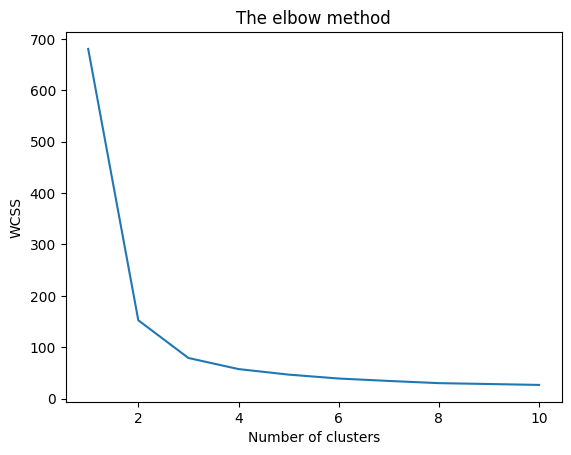

In [56]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### As the Elbow Method gives us the value 3

# Creating Gausian Mixture Model to Perform EM operation

In [57]:
x=df.iloc[:,:4]
gmm=GaussianMixture(n_components=3)
gmm.fit(X_train)
y_prediction=gmm.predict(X_test)

In [58]:
class_names=["Iris-setosa","Iris-virginica","Iris-versicolor"]
print(classification_report(y_test, y_prediction ,target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        18
 Iris-virginica       0.00      0.00      0.00        10
Iris-versicolor       1.00      0.76      0.87        17

       accuracy                           0.29        45
      macro avg       0.33      0.25      0.29        45
   weighted avg       0.38      0.29      0.33        45



[]

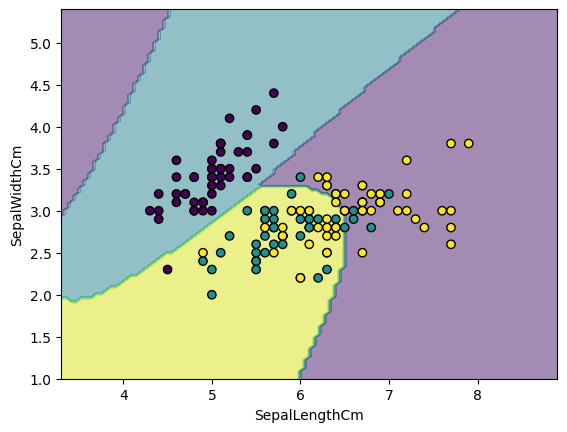

In [59]:
x=df.iloc[:,:2]
gmm=GaussianMixture(n_components=3)
gmm.fit(x)
disp=DecisionBoundaryDisplay.from_estimator(gmm,
                                        x,
                                        response_method="predict",
                                        alpha=0.5)
disp.ax_.scatter(df.iloc[:,:1], df.iloc[:,1:2], c=df['Species'].to_numpy(), edgecolor="k")
plt.plot()